## 1. Amazon Sales Data

In [1]:
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/amazon.csv")

In [3]:
df.discounted_price = df.discounted_price.str.replace("₹","").str.replace(",","")
df.actual_price = df.actual_price.str.replace("₹","").str.replace(",","")
df.discount_percentage = df.discount_percentage.str.replace("%","")
df.rating_count = df.rating_count.str.replace(",","")
df.rating = df.rating.str.replace("|","0")

In [4]:
df.rating = pd.to_numeric(df.rating.fillna(0),errors='coerce')
df.rating_count = pd.to_numeric(df.rating_count.fillna(0),errors='coerce')

In [5]:
df.discounted_price = df.discounted_price.astype(float)
df.actual_price = df.actual_price.astype(float)
df.discount_percentage = df.discount_percentage.astype(float)
df.discount_percentage = df.discount_percentage.astype(float)
df.rating_count = df.rating_count.astype(int)

In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

#### 1. What is the average rating for each product category?

In [7]:
average_rating = df.groupby('category')['rating'].mean().reset_index()
average_rating.columns = ['category','Average rating']
average_rating.sort_values(by='Average rating',ascending=False)

,category,Average rating
57,Computers&Accessories|Tablets,4.60
48,Computers&Accessories|NetworkingDevices|Networ...,4.50
62,Electronics|Cameras&Photography|Accessories|Film,4.50
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.50
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.50
...,...,...
88,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.50
2,Computers&Accessories|Accessories&Peripherals|...,3.50
187,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",3.45
14,Computers&Accessories|Accessories&Peripherals|...,3.40


#### 2. What are the top products by rating count for each category?


In [8]:
total_rating_by_category = df.groupby('category')['rating_count'].sum().reset_index()
total_rating_by_category.columns = ['category','Total rating']
total_rating_by_category.sort_values('Total rating',ascending=False)

,category,Total rating
76,"Electronics|Headphones,Earbuds&Accessories|Hea...",4204939
10,Computers&Accessories|Accessories&Peripherals|...,3547816
117,Electronics|Mobiles&Accessories|Smartphones&Ba...,2493269
89,"Electronics|HomeTheater,TV&Video|Accessories|C...",1906054
119,Electronics|WearableTechnology|SmartWatches,1644476
...,...,...
36,Computers&Accessories|Components|InternalHardD...,362
43,Computers&Accessories|Laptops|TraditionalLaptops,323
106,Electronics|Mobiles&Accessories|MobileAccessor...,305
86,Electronics|HomeAudio|Speakers|TowerSpeakers,282


#### 3. What is the distribution of discounted prices compared to actual prices?


In [9]:
df.discounted_price.dtype,df.actual_price.dtype

(dtype('float64'), dtype('float64'))

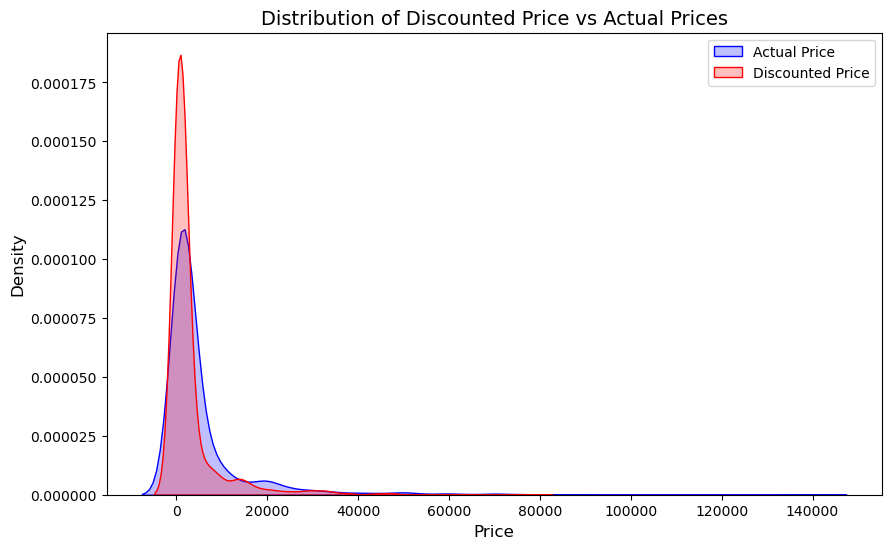

In [10]:
plt.figure(figsize=(10,6))

sns.kdeplot(df.actual_price,label='Actual Price',color='blue',fill=True)
sns.kdeplot(df.discounted_price,label='Discounted Price',color='Red',fill=True)

plt.title('Distribution of Discounted Price vs Actual Prices',fontsize=14)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Density',fontsize=12)

plt.legend()

plt.show()

#### 4. How does the average discount percentage vary across categories?

In [11]:
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

average_discount_by_category.columns = ['Category', 'Average Discount Percentage']

average_discount_by_category = average_discount_by_category.sort_values(by='Average Discount Percentage', ascending=False)

average_discount_by_category

,Category,Average Discount Percentage
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
6,Computers&Accessories|Accessories&Peripherals|...,90.0
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.0
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.0
14,Computers&Accessories|Accessories&Peripherals|...,87.5
...,...,...
196,OfficeProducts|OfficeElectronics|Calculators|B...,0.0
176,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.0
81,Electronics|HomeAudio|MediaStreamingDevices|St...,0.0
62,Electronics|Cameras&Photography|Accessories|Film,0.0


#### 5. What are the most popular product names?


In [12]:
most_popular_product = df.groupby('product_name')['rating_count'].sum().reset_index()

most_popular_product.columns = ['Product Name','Total Rating Count']

most_popular_product = most_popular_product.sort_values(by='Total Rating Count',ascending=False)

top_n = 10 

top_popular_products = most_popular_product.head(top_n)

top_popular_products

,Product Name,Total Rating Count
101,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
511,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177
1256,boAt Bassheads 100 in Ear Wired Earphones with...,363713
1257,boAt Bassheads 100 in Ear Wired Earphones with...,363713
1253,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711
900,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836
898,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836
901,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832


#### 6. What are the most popular product keywords?


In [13]:
all_keywords = ''.join(df['about_product'].dropna())

keywords_list = all_keywords.split(',')

keywords_list = [keyword.strip() for keyword in keywords_list]

keyword_counts = Counter(keywords_list)

keywords_df = pd.DataFrame(keyword_counts.items(),columns = ['Keyword','Frequency'])

popular_keywords = keywords_df.sort_values(by='Frequency',ascending=False)

top_n = 10 

top_popular_keywords= popular_keywords.head(top_n)

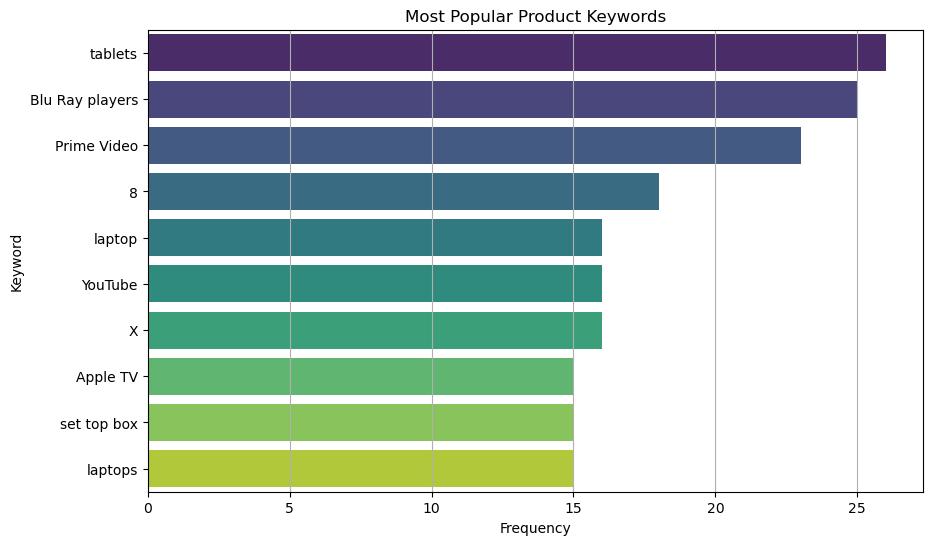

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency',y='Keyword',data=top_popular_keywords,palette='viridis')
plt.title('Most Popular Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.grid(axis='x')
plt.show()

#### 7. What are the most popular product reviews?


In [15]:
import pandas as pd 

most_popular_reviews = df.groupby('review_title')['review_id'].count().reset_index()

most_popular_reviews.columns=['Review Title','Frequency']

most_popular_reviews = most_popular_reviews.sort_values(by='Frequency',ascending=False)

top_popular_reviews=most_popular_reviews.head(10)

top_popular_products

,Product Name,Total Rating Count
101,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
511,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177
1256,boAt Bassheads 100 in Ear Wired Earphones with...,363713
1257,boAt Bassheads 100 in Ear Wired Earphones with...,363713
1253,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711
900,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836
898,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836
901,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832


#### 8. What is the correlation between discounted_price and rating?


In [16]:
correlation = df['discounted_price'].corr(df['rating'])
print(f'Correlation between discounted price and rating:{correlation}')

Correlation between discounted price and rating:0.11429770050484662


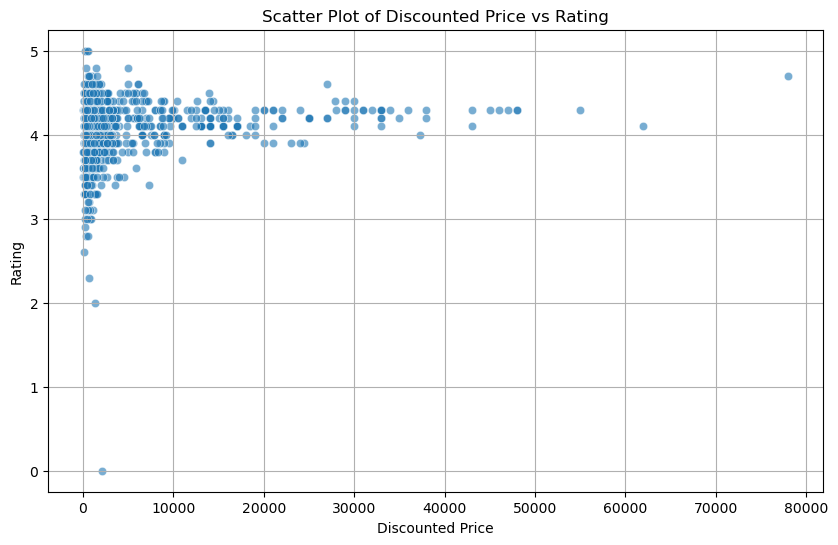

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discounted_price',y='rating',data=df,alpha=0.6)
plt.title('Scatter Plot of Discounted Price vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

#### 9. What are the Top 5 categories based on the highest ratings?


In [18]:
top_categories = df.groupby('category')['rating'].mean().reset_index()

top_categories.columns = ['Category','Average Rating']

top_categories = top_categories.sort_values(by='Average Rating',ascending=False)

top_categories.head(5)

,Category,Average Rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.5


#### 10. Identify any potential areas for improvement or optimization based on the data analysis.


Based on the data analysis, some potential areas for improvement or optimization could be:

1. **Improving Product Ratings**: Address any issues mentioned in the reviews to enhance the overall product rating.

2. **Increasing Rating Counts**: Encourage more customers to leave ratings, providing a more accurate representation of customer satisfaction.

3. **Enhancing Product Descriptions**: Improve product descriptions to better highlight features and benefits, making them more appealing to potential buyers.

4. **Adjusting Pricing Strategy**: Optimize pricing strategies by maximizing the discount percentage to attract more customers.


## 2. Spotify Data: Popular Hip-hop Artists and Tracks

In [19]:
df=pd.read_csv("Data/spotify.csv")
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


#### 1. Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary.

In [20]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [21]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [22]:
df.duplicated().sum()

27

In [23]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 16.3+ KB


#### 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.


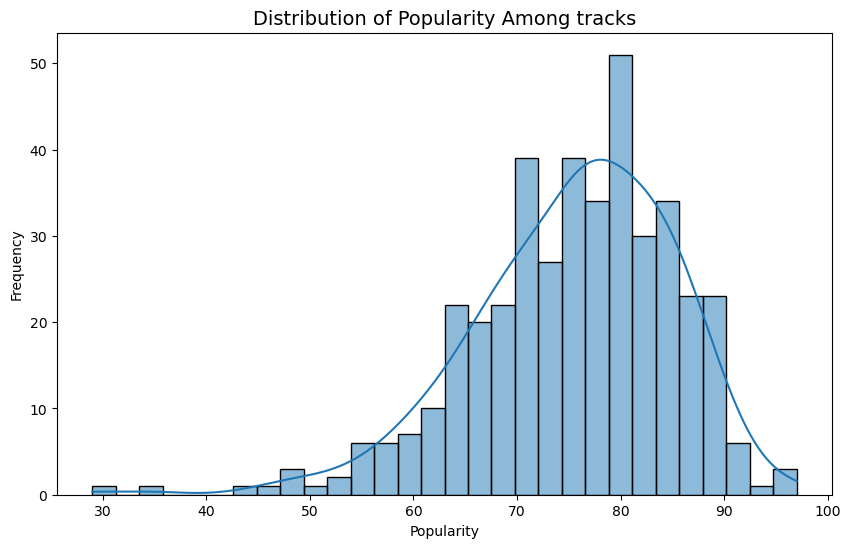

In [25]:
plt.figure(figsize=(10,6))

sns.histplot(df['Popularity'],bins=30,kde=True)

plt.title('Distribution of Popularity Among tracks',fontsize=14)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

#### 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.


<AxesSubplot:xlabel='Duration (ms)', ylabel='Popularity'>

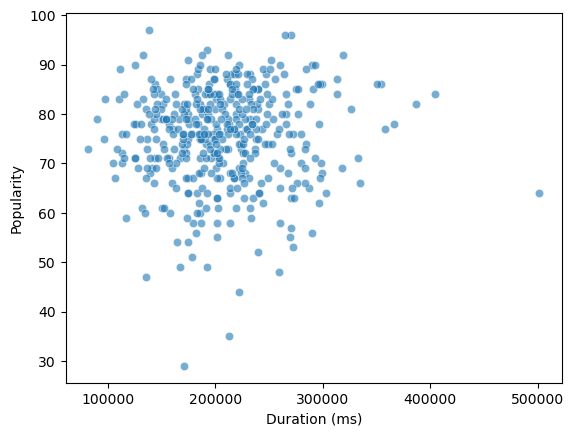

In [26]:
sns.scatterplot(data=df,x='Duration (ms)',y='Popularity',alpha=0.6)

#### The plot indicates that there doesn't appear to be a relationship between track popularity and duration. We can further validate this by calculating the correlation coefficient.

In [27]:
df['Duration (ms)'].corr(df['Popularity'])

0.038992009284390984

#### 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a count plot.


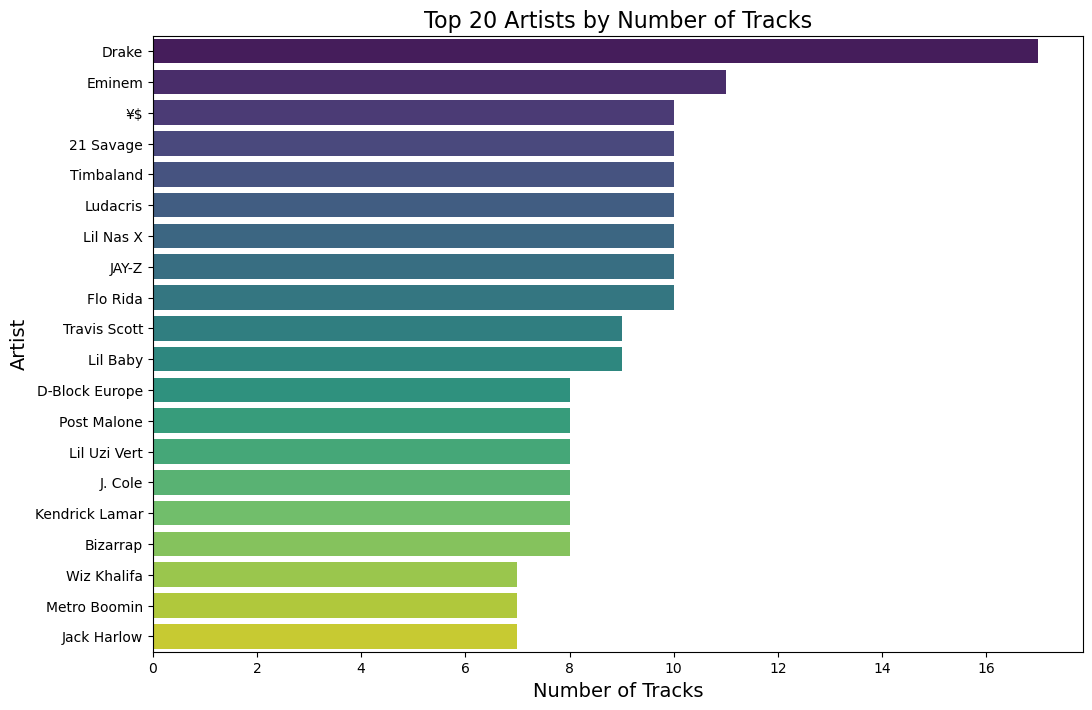

In [28]:
top_artists = df.groupby('Artist').size().reset_index(name='Track Count')

N = 20  
top_artists = top_artists.sort_values(by='Track Count', ascending=False).head(N)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_artists, y='Artist', x='Track Count', palette='viridis')

plt.title(f'Top {N} Artists by Number of Tracks', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)
plt.ylabel('Artist', fontsize=14)

# Show the plot
plt.show()

#### 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.


In [29]:
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

In [30]:
least_popular_tracks

,Artist,Track Name,Popularity
199,Pressa,Attachments (feat. Coi Leray),29
219,Justin Bieber,Intentions,35
390,French Montana,Splash Brothers,44
213,Lil Baby,On Me - Remix,47
384,Wyclef Jean,911 (feat. Mary J. Blige),48


#### 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.


In [31]:
average_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

top_artists = average_popularity.sort_values(by='Popularity', ascending=False).head(5)

print("Top 5 Most Popular Artists and Their Average Popularity:")
top_artists

Top 5 Most Popular Artists and Their Average Popularity:


,Artist,Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,86.555556
114,¥$,85.100000


#### 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [32]:
average_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort to find the top 5 most popular artists
top_artists = average_popularity.sort_values(by='Popularity', ascending=False).head(5)

# Initialize a list to store the most popular tracks for each top artist
most_popular_tracks = {}

# Find the most popular track for each top artist
for artist in top_artists['Artist']:
    most_popular_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    most_popular_tracks[artist] = most_popular_track

# Display the most popular tracks for each top artist
print("Most Popular Tracks for Top 5 Most Popular Artists:")
for artist, track in most_popular_tracks.items():
    print(f"Artist: {artist}, Most Popular Track: {track['Track Name'].values[0]}, Popularity: {track['Popularity'].values[0]}")

Most Popular Tracks for Top 5 Most Popular Artists:
Artist: cassö, Most Popular Track: Prada, Popularity: 92
Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole, Popularity: 89
Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me, Popularity: 87
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti), Popularity: 93
Artist: ¥$, Most Popular Track: CARNIVAL, Popularity: 96


#### 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.


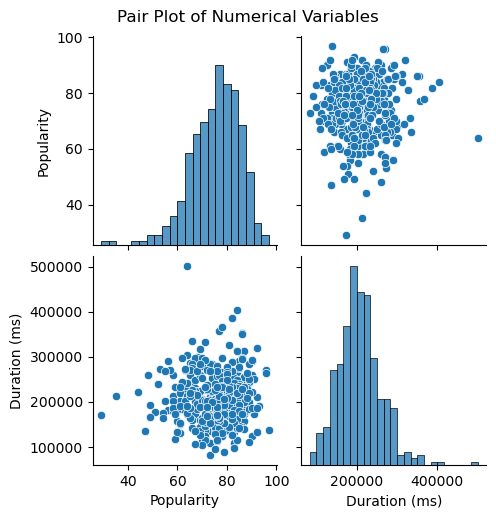

In [33]:
numerical_columns = [column for column in df.columns if df[column].dtype!='O']
# Create a pair plot
sns.pairplot(df[numerical_columns])

# Show the plot
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) 
plt.show()

#### 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


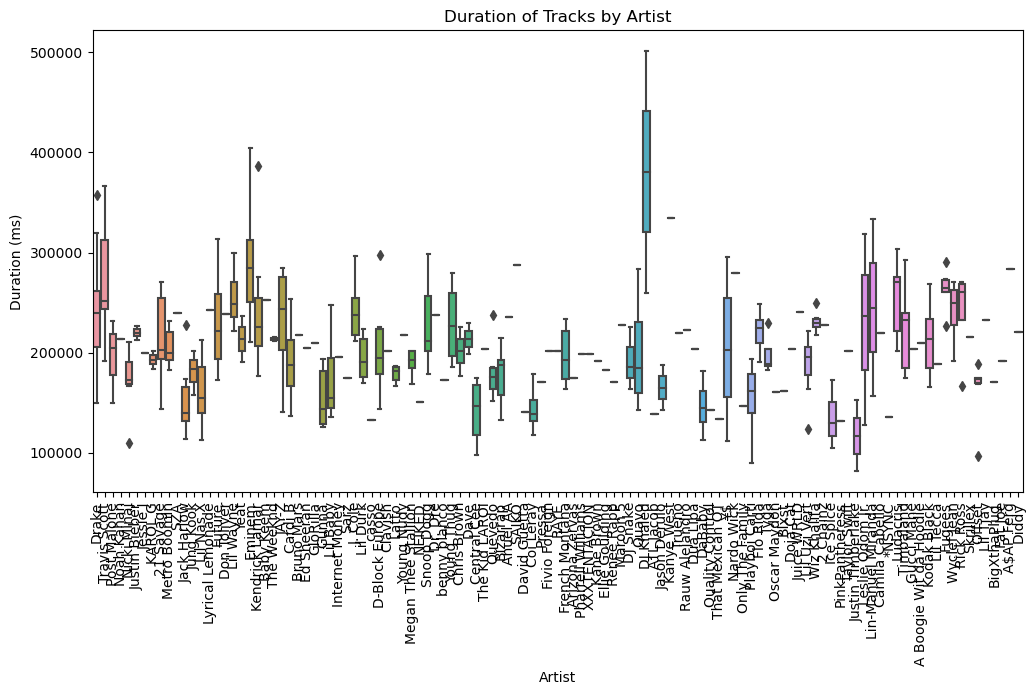

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)  
plt.title('Duration of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

#### 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.


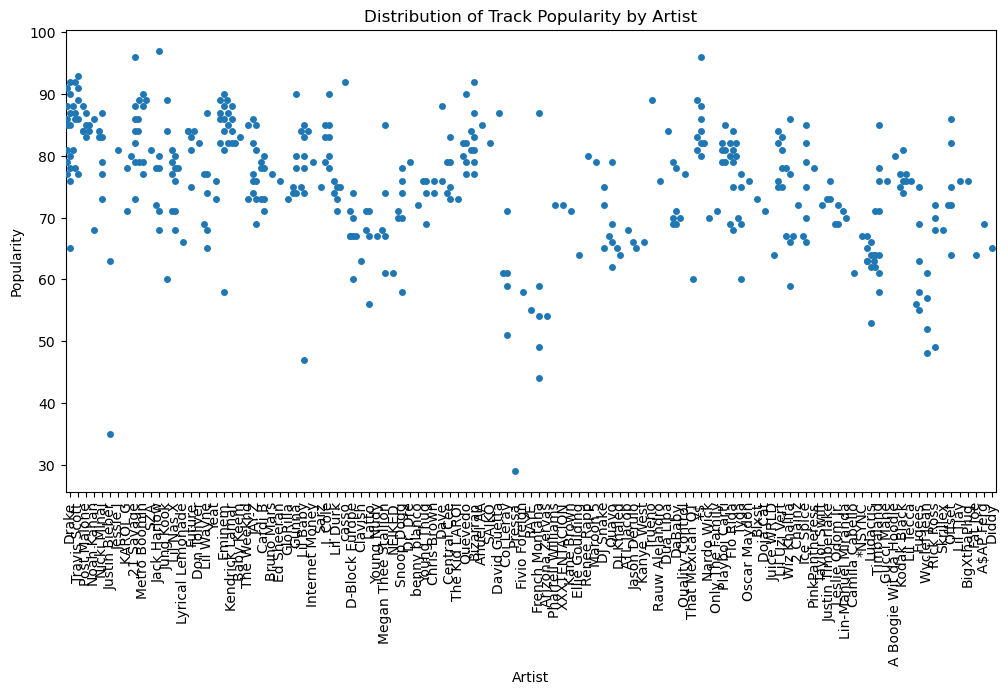

In [35]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)  # Rotate artist names for better visibility
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()